In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt

df = pd.read_csv('loan_data.csv')

np.random.seed(42)
indices_to_replace = np.random.choice(len(df), size=666, replace=False)
df.loc[indices_to_replace, 'previous_loan_defaults_on_file'] = np.nan
np.random.seed(41)
indices_to_replace = np.random.choice(len(df), size=576, replace=False)
df.loc[indices_to_replace, 'person_education'] = np.nan
rows_to_duplicate = []
for idx in range(2, 15):
    row = df.loc[idx].copy()
    rows_to_duplicate.append(row)
duplicates_df = pd.DataFrame(rows_to_duplicate)
df = pd.concat([df, duplicates_df], ignore_index=False)

print(f"\nРазмер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
display(df.head(6))


Размер датасета: 45013 строк, 14 столбцов


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,NaN,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1


In [ ]:
print("Типы данных:")
print(df.dtypes)

Типы данных:
person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object


In [ ]:
df = df.replace('?', np.nan)
print("Количество пропущенных значений по столбцам:")
print(df.isnull().sum())
print("\nПроцент пропущенных значений:")
print((df.isnull().sum() / len(df)) * 100)

Количество пропущенных значений по столбцам:
person_age                          0
person_gender                       0
person_education                  576
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                           0
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                        0
previous_loan_defaults_on_file    667
loan_status                         0
dtype: int64

Процент пропущенных значений:
person_age                        0.000000
person_gender                     0.000000
person_education                  1.279630
person_income                     0.000000
person_emp_exp                    0.000000
person_home_ownership             0.000000
loan_amnt                         0.000000
loan_intent                       0.000000
loan_int_rate                     0

In [ ]:
df = df.dropna()
print("Пропуски после удаления:")
print(df.isnull().sum())

Пропуски после удаления:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [ ]:
print(f'Исходное количество строк: {len(df)}')
df = df.drop_duplicates()
print(f"Количество строк после удаления дубликатов: {len(df)}")

Исходное количество строк: 43779
Количество строк после удаления дубликатов: 43767


/tmp/ipython-input-1978466805.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='loan_status', palette='viridis')


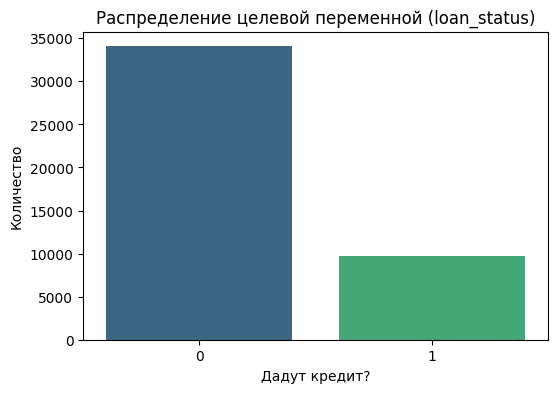

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='loan_status', palette='viridis')
plt.title('Распределение целевой переменной (loan_status)')
plt.xlabel('Дадут кредит?')
plt.ylabel('Количество')
plt.show()

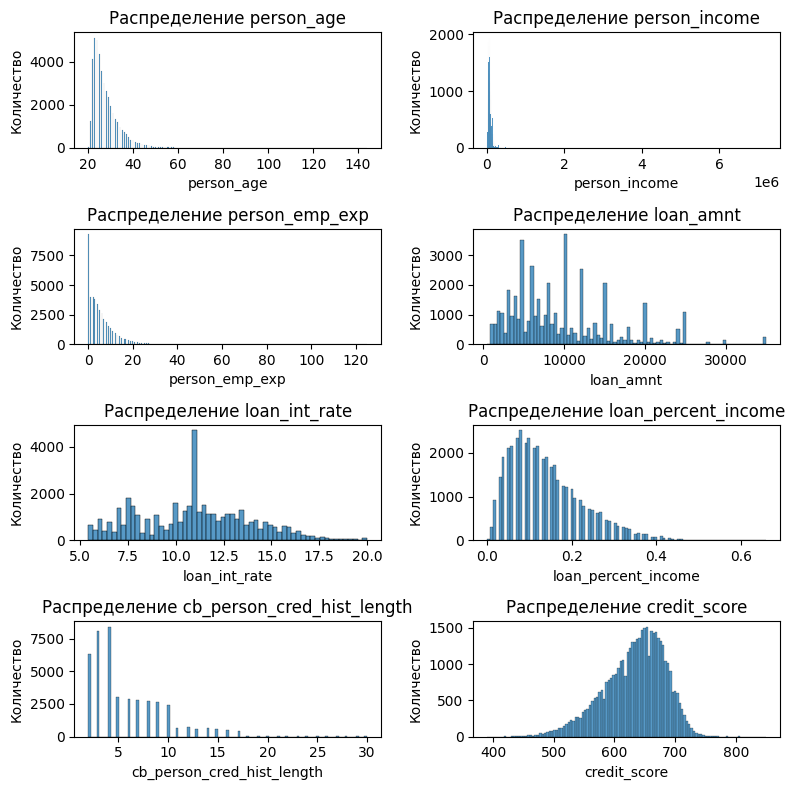

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns.drop('loan_status')
plt.figure(figsize=(8, 8))
for i, col in enumerate(numeric_cols):
  plt.subplot(4, 2, i+1)
  sns.histplot(df, x=df[col])
  plt.title(f'Распределение {col}')
  plt.xlabel(col)
  plt.ylabel('Количество')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3178474447.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_data, y=col, order=top_categories, ax=axes[i], palette='viridis')
/tmp/ipython-input-3178474447.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_data, y=col, order=top_categories, ax=axes[i], palette='viridis')
/tmp/ipython-input-3178474447.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_data, y=col, order=top_categories, ax=axes[i], palette='viridis')
/tmp/ipython-input-3178474447.py:8: FutureWarning: 

Pa

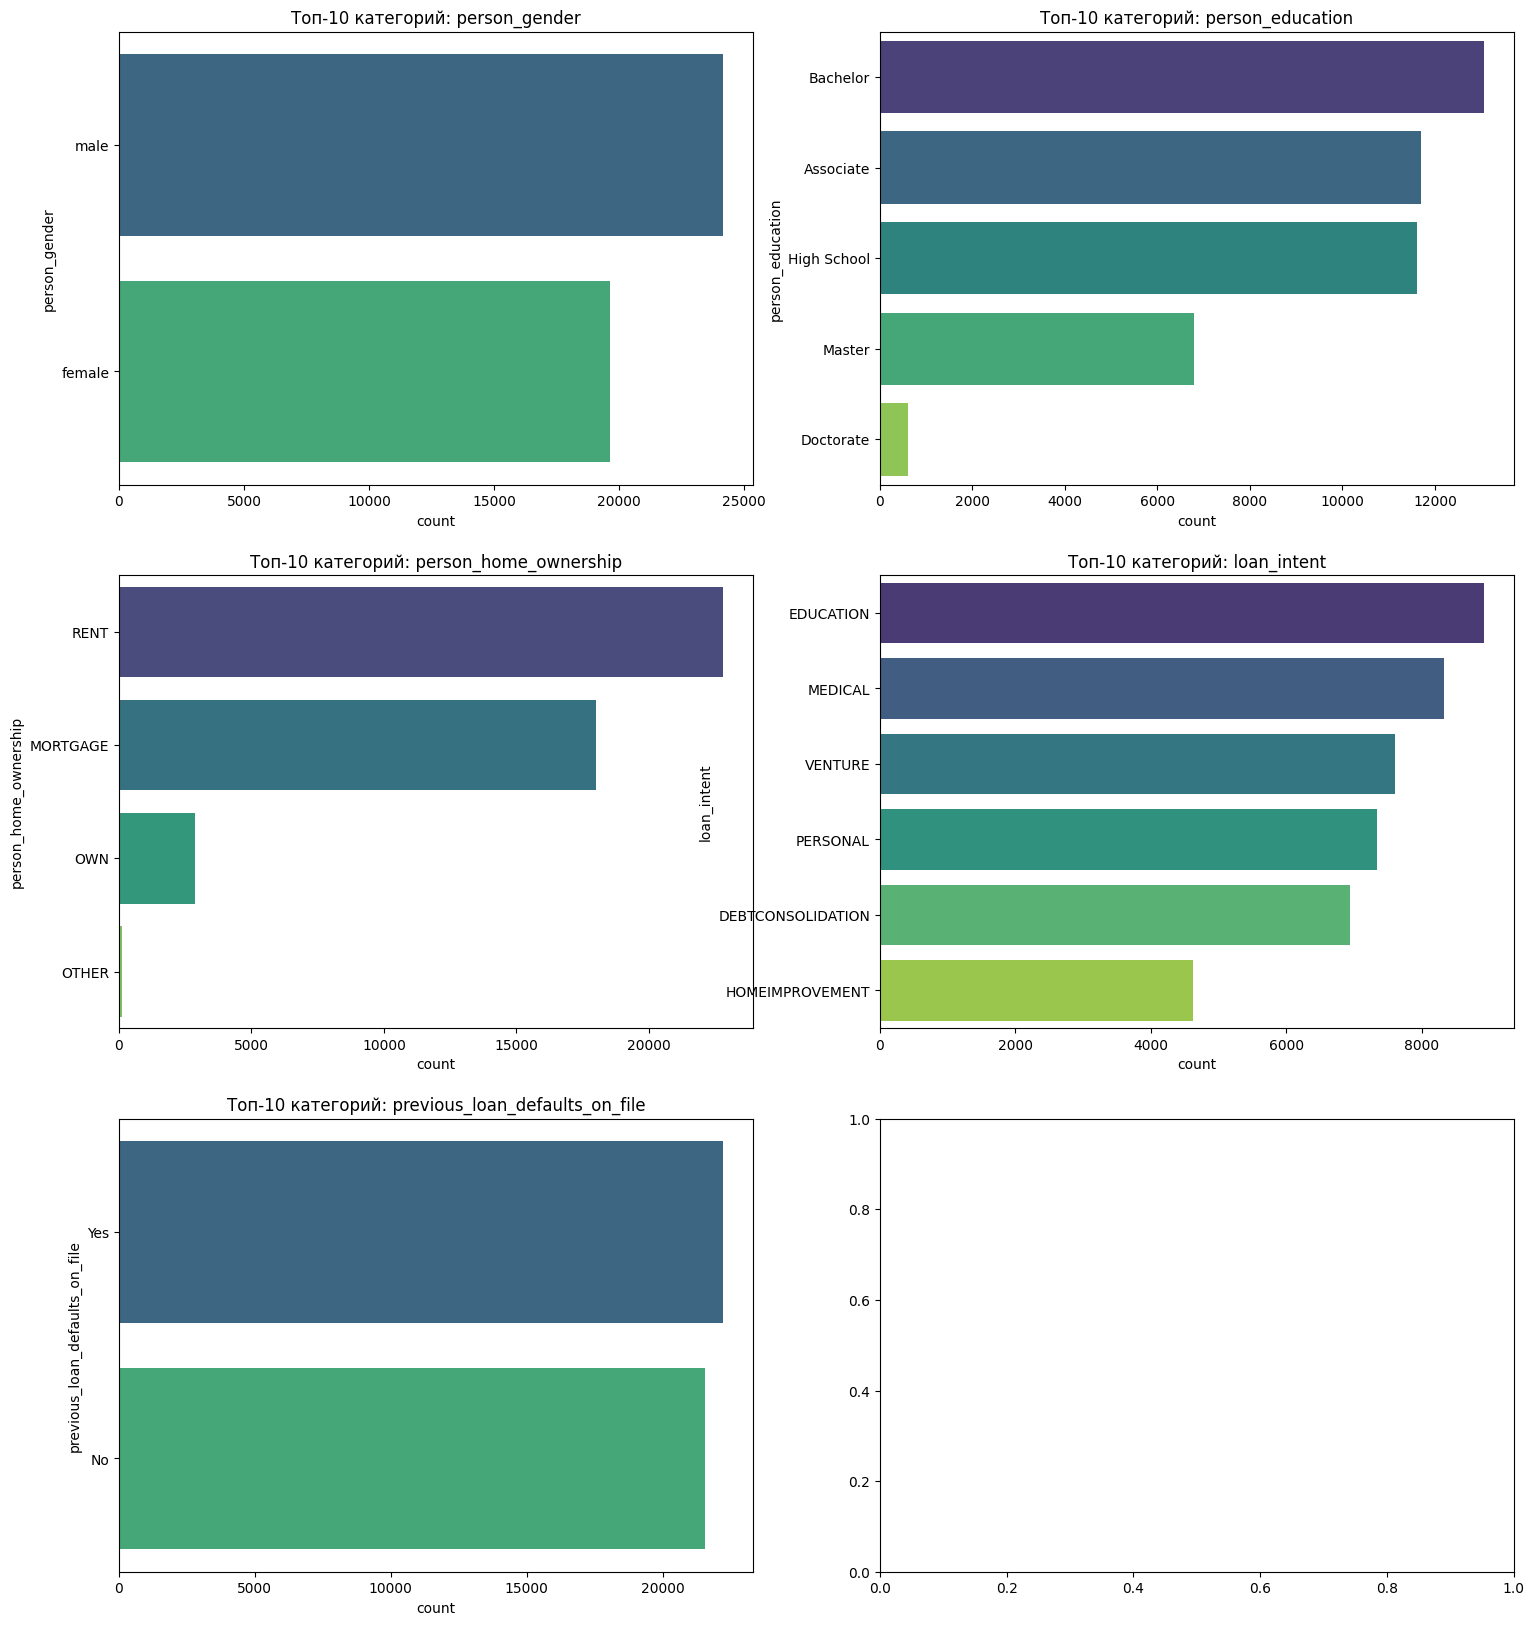

In [ ]:
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
fig, axes = plt.subplots(3, 2, figsize=(18, 20))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    top_categories = df[col].value_counts().head(10).index
    filtered_data = df[df[col].isin(top_categories)]
    sns.countplot(data=filtered_data, y=col, order=top_categories, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Топ-10 категорий: {col}')


In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

print("\nТипы данных после кодирования:")
print(df_encoded.dtypes)
print("\nПервые 5 строк закодированного датасета:")
display(df_encoded.head())


Типы данных после кодирования:
person_age                        float64
person_gender                       int64
person_education                    int64
person_income                     float64
person_emp_exp                      int64
person_home_ownership               int64
loan_amnt                         float64
loan_intent                         int64
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file      int64
loan_status                         int64
dtype: object

Первые 5 строк закодированного датасета:


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
5,21.0,0,3,12951.0,0,2,2500.0,5,7.14,0.19,2.0,532,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler # скейл

numeric_cols = df_encoded.select_dtypes(include=['number']).columns.drop('loan_status')
print("Числовые признаки для масштабирования:", *numeric_cols)
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])
print("Числовые признаки после масштабирования (первые 5 строк):")
display(df_encoded[numeric_cols].head())


NameError: name 'df_encoded' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['loan_status'])
y = df_encoded['loan_status']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Размер обучающей выборки: {X_train.shape[0]} строк")
print(f"Размер тестовой выборки: {X_test.shape[0]} строк")
print(f"Доля класса 1 в train: {y_train.mean():.3f}")
print(f"Доля класса 1 в test: {y_test.mean():.3f}")

Размер обучающей выборки: 35013 строк
Размер тестовой выборки: 8754 строк
Доля класса 1 в train: 0.222
Доля класса 1 в test: 0.222


In [ ]:
df_encoded = df_encoded.drop(columns=['loan_status'])

k=2: Время обучения=1.08с, WCSS=492162, Silhouette=0.185, DB=2.125, CH=6830
k=3: Время обучения=0.78с, WCSS=449026, Silhouette=0.123, DB=2.288, CH=5845


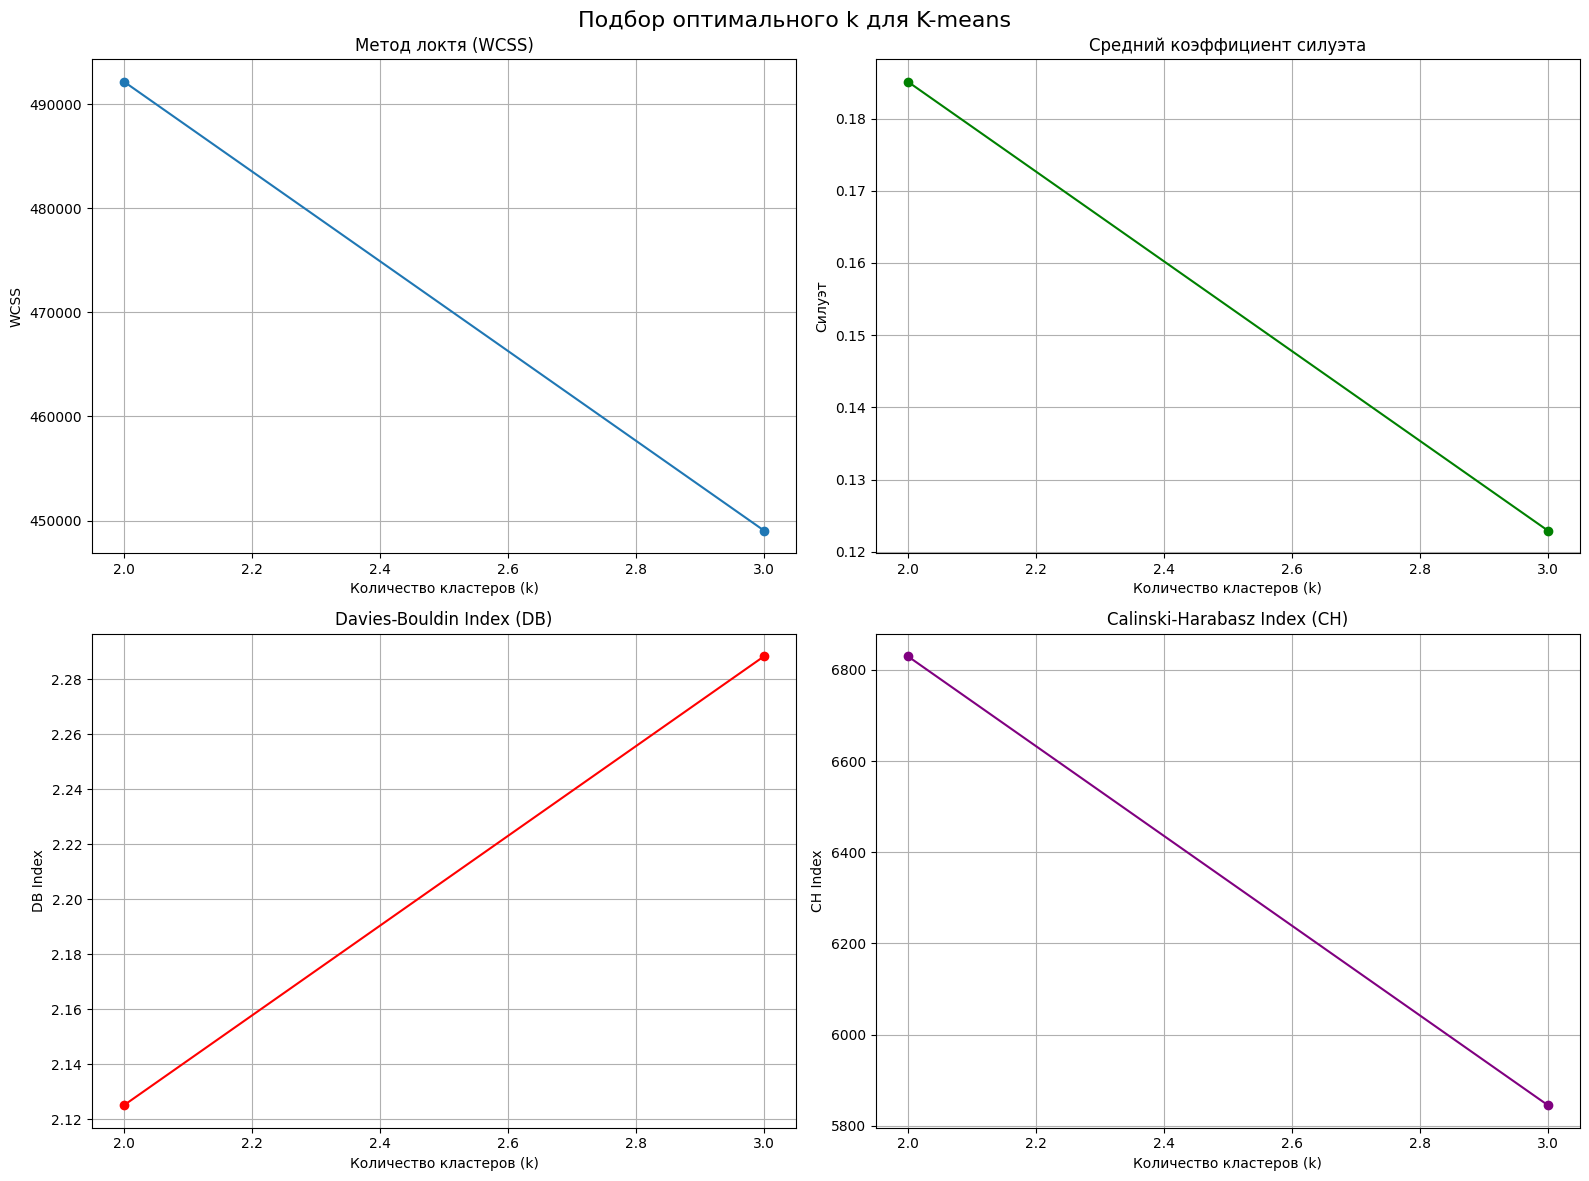


=== Результаты подбора количества кластеров k для K-means ===
Наиболее высокий коэффициент силуэта: 0.185 при k=2
Наименьший DB Index: 2.125 при k=2
Наибольший CH Index: 6830 при k=2
Метод локтя показывает излом на k=3, но часто он неочевиден в высокоразмерных данных.


In [ ]:
import time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

X = df_encoded.copy()
k_range = range(2, 4)

wcss_scores = [] # Within-Cluster Sum of Squares (WCSS)
silhouette_scores = [] # Silhouette Score
db_scores = [] # Davies-Bouldin Index
ch_scores = [] # Calinski-Harabasz Score
training_times = [] # Время обучения

for k in k_range:
    start_time = time.time()  # Время начала обучения

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(X)

    end_time = time.time()  # Время окончания обучения
    training_time = end_time - start_time
    training_times.append(training_time)

    wcss = kmeans.inertia_
    sil_score = silhouette_score(X, kmeans_labels)
    db_score = davies_bouldin_score(X, kmeans_labels)
    ch_score = calinski_harabasz_score(X, kmeans_labels)

    wcss_scores.append(wcss)
    silhouette_scores.append(sil_score)
    db_scores.append(db_score)
    ch_scores.append(ch_score)

    print(f"k={k}: Время обучения={training_time:.2f}с, WCSS={wcss:.0f}, Silhouette={sil_score:.3f}, DB={db_score:.3f}, CH={ch_score:.0f}")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Подбор оптимального k для K-means', fontsize=16)

# Метод локтя (WCSS)
axes[0,0].plot(k_range, wcss_scores, marker='o')
axes[0,0].set_title('Метод локтя (WCSS)')
axes[0,0].set_xlabel('Количество кластеров (k)')
axes[0,0].set_ylabel('WCSS')
axes[0,0].grid(True)

# Silhouette Score
axes[0,1].plot(k_range, silhouette_scores, marker='o', color='green')
axes[0,1].set_title('Средний коэффициент силуэта')
axes[0,1].set_xlabel('Количество кластеров (k)')
axes[0,1].set_ylabel('Силуэт')
axes[0,1].grid(True)

# Davies-Bouldin Index
axes[1,0].plot(k_range, db_scores, marker='o', color='red')
axes[1,0].set_title('Davies-Bouldin Index (DB)')
axes[1,0].set_xlabel('Количество кластеров (k)')
axes[1,0].set_ylabel('DB Index')
axes[1,0].grid(True)

# Calinski-Harabasz Index
axes[1,1].plot(k_range, ch_scores, marker='o', color='purple')
axes[1,1].set_title('Calinski-Harabasz Index (CH)')
axes[1,1].set_xlabel('Количество кластеров (k)')
axes[1,1].set_ylabel('CH Index')
axes[1,1].grid(True)

plt.tight_layout()
plt.show()

optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
optimal_k_elbow = k_range[wcss_scores.index(min(wcss_scores))]

print(f'''\n=== Результаты подбора количества кластеров k для K-means ===
Наиболее высокий коэффициент силуэта: {max(silhouette_scores):.3f} при k={optimal_k_silhouette}
Наименьший DB Index: {min(db_scores):.3f} при k={k_range[np.argmin(db_scores)]}
Наибольший CH Index: {max(ch_scores):.0f} при k={k_range[np.argmax(ch_scores)]}
Метод локтя показывает излом на k={optimal_k_elbow}, но часто он неочевиден в высокоразмерных данных.''')


In [ ]:
from sklearn.cluster import KMeans

optimal_k = 2

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels_kmeans = kmeans_optimal.fit_predict(X)

df_with_clusters = df.copy()
df_with_clusters['cluster_kmeans'] = cluster_labels_kmeans
print(f'''\n=== Результаты K-means с k={optimal_k} ===
Распределение по кластерам:''')
print(df_with_clusters['cluster_kmeans'].value_counts().sort_index())

silhouette_score_kmeans = silhouette_score(X, cluster_labels_kmeans)
davies_bouldin_score_kmeans = davies_bouldin_score(X, cluster_labels_kmeans)
calinski_harabasz_score_kmeans = calinski_harabasz_score(X, cluster_labels_kmeans)

print(f'''\nМетрики для K-means (k={optimal_k}):
  Средний коэффициент силуэта: {silhouette_score_kmeans:.3f}
  Индекс Дэвиса-Боулдина: {davies_bouldin_score_kmeans:.3f}
  Индекс Калински-Харабаса: {calinski_harabasz_score_kmeans:.0f}''')


start_time = time.time()
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels_kmeans = kmeans_optimal.fit_predict(X)
end_time = time.time()
training_time_kmeans = end_time - start_time
print(f"  Время обучения: {training_time_kmeans:.2f} секунд")



=== Результаты K-means с k=2 ===
Распределение по кластерам:
cluster_kmeans
0    33436
1    10331
Name: count, dtype: int64

Метрики для K-means (k=2):
  Средний коэффициент силуэта: 0.185
  Индекс Дэвиса-Боулдина: 2.125
  Индекс Калински-Харабаса: 6830
  Время обучения: 0.58 секунд


Используется выборка из 5000 строк для иерархической кластеризации.

Обучение иерархической кластеризации с методом 'ward'...


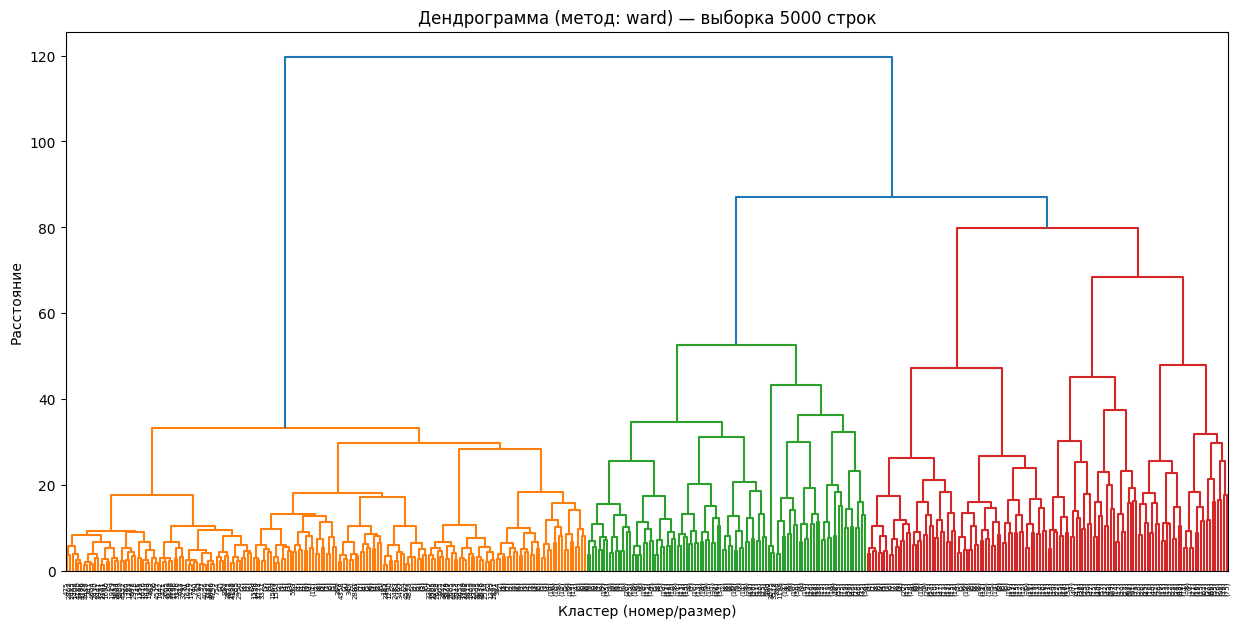


Обучение иерархической кластеризации с методом 'average'...

Обучение иерархической кластеризации с методом 'complete'...

=== Время обучения для иерархической кластеризации ===
ward: 1.22 секунд
average: 1.94 секунд
complete: 1.52 секунд


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist

np.random.seed(1984)
sample_size = 5000
X_sample = X.sample(n=sample_size, random_state=1984)

print(f"Используется выборка из {X_sample.shape[0]} строк для иерархической кластеризации.")

linkage_methods = ['ward', 'average', 'complete']
results_hierarchy = {}

for method in linkage_methods:
    print(f"\nОбучение иерархической кластеризации с методом '{method}'...")
    start_time = time.time()

    linkage_matrix = linkage(X_sample, method=method, metric='euclidean')
    results_hierarchy[method] = {
        'linkage': linkage_matrix,
        'time': time.time() - start_time
    }

    if method == 'ward':
        plt.figure(figsize=(15, 7))
        dendrogram(linkage_matrix, truncate_mode='level', p=8, show_leaf_counts=True)
        plt.title(f'Дендрограмма (метод: {method}) — выборка {sample_size} строк')
        plt.xlabel('Кластер (номер/размер)')
        plt.ylabel('Расстояние')
        plt.show()

print("\n=== Время обучения для иерархической кластеризации ===")
for method, info in results_hierarchy.items():
    print(f"{method}: {info['time']:.2f} секунд")


In [ ]:
from scipy.cluster.hierarchy import fcluster

optimal_k_hier = 2
cluster_labels_hier_sample = fcluster(results_hierarchy['ward']['linkage'], optimal_k_hier, criterion='maxclust')

centroids = []
for cluster_id in np.unique(cluster_labels_hier_sample):
    cluster_points = X_sample[cluster_labels_hier_sample == cluster_id]
    centroid = cluster_points.mean(axis=0)
    centroids.append(centroid)

centroids = np.array(centroids)

from sklearn.metrics.pairwise import euclidean_distances

distances = euclidean_distances(X, centroids)

cluster_labels_full = np.argmin(distances, axis=1) + 1

df_with_clusters['cluster_hier'] = cluster_labels_full

print(f'''=== Результаты иерархической кластеризации на полном датасете ===
Распределение по кластерам:
{df_with_clusters['cluster_hier'].value_counts().sort_index()}''')

silhouette_score_hier_full = silhouette_score(X, cluster_labels_full)
davies_bouldin_score_hier_full = davies_bouldin_score(X, cluster_labels_full)
calinski_harabasz_score_hier_full = calinski_harabasz_score(X, cluster_labels_full)
print(f'''\nМетрики для иерархической кластеризации (k={optimal_k_hier}) на полном датасете:
  Средний коэффициент силуэта: {silhouette_score_hier_full:.3f}
  Индекс Дэвиса-Боулдина: {davies_bouldin_score_hier_full:.3f}
  Индекс Калински-Харабаса: {calinski_harabasz_score_hier_full:.0f}''')


=== Результаты иерархической кластеризации на полном датасете ===
Распределение по кластерам:
cluster_hier
1     5324
2    38443
Name: count, dtype: int64

Метрики для иерархической кластеризации (k=2) на полном датасете:
  Средний коэффициент силуэта: 0.258
  Индекс Дэвиса-Боулдина: 1.683
  Индекс Калински-Харабаса: 6627


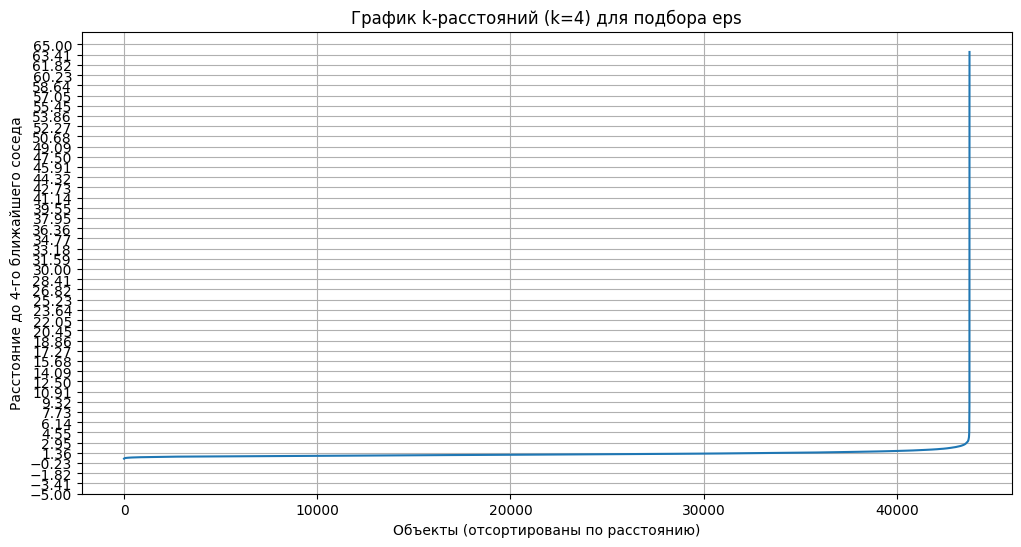

In [ ]:
from sklearn.neighbors import NearestNeighbors

k = 4
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X)
distances, indices = neigh.kneighbors(X)
k_distances = distances[:, k-1]
k_distances_sorted = np.sort(k_distances)
plt.figure(figsize=(12, 6))
plt.plot(range(len(k_distances_sorted)), k_distances_sorted, linewidth=1.5)
plt.title(f'График k-расстояний (k={k}) для подбора eps')
plt.xlabel('Объекты (отсортированы по расстоянию)')
plt.ylabel(f'Расстояние до {k}-го ближайшего соседа')
plt.yticks(np.linspace(-5, 65, 45))
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

optimal_eps = 2
optimal_min_samples = 4

dbscan_optimal = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
cluster_labels_dbscan = dbscan_optimal.fit_predict(X)

df_with_clusters['cluster_dbscan'] = cluster_labels_dbscan
print(f'''=== Результаты DBSCAN (eps={optimal_eps}, min_samples={optimal_min_samples}) ===
Распределение по кластерам:
{df_with_clusters['cluster_dbscan'].value_counts().sort_index()}''')

silhouette_score_dbscan = silhouette_score(X, cluster_labels_dbscan)
davies_bouldin_score_dbscan = davies_bouldin_score(X, cluster_labels_dbscan)
calinski_harabasz_score_dbscan = calinski_harabasz_score(X, cluster_labels_dbscan)

print(f'''\nМетрики для DBSCAN (eps={optimal_eps}, min_samples={optimal_min_samples}):
  Средний коэффициент силуэта: {silhouette_score_dbscan:.3f}
  Индекс Дэвиса-Боулдина: {davies_bouldin_score_dbscan:.3f}
  Индекс Калински-Харабаса: {calinski_harabasz_score_dbscan:.0f}''')

start_time = time.time()
dbscan_optimal = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
cluster_labels_dbscan = dbscan_optimal.fit_predict(X)
end_time = time.time()
training_time_dbscan = end_time - start_time
print(f"  Время обучения: {training_time_dbscan:.2f} секунд")


=== Результаты DBSCAN (eps=2, min_samples=4) ===
Распределение по кластерам:
cluster_dbscan
-1      808
 0     9772
 1     9473
 2    11608
 3    12080
 4        3
 5        5
 6        9
 7        5
 8        4
Name: count, dtype: int64

Метрики для DBSCAN (eps=2, min_samples=4):
  Средний коэффициент силуэта: 0.069
  Индекс Дэвиса-Боулдина: 2.008
  Индекс Калински-Харабаса: 1212
  Время обучения: 64.84 секунд


In [ ]:
# min_samples = 4 # слишком долго
# eps_values = np.arange(1.5, 3.1, 0.1)

# best_eps = None
# best_silhouette = -1
# best_labels = None

# results = []

# for eps in eps_values:
#     dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#     labels = dbscan.fit_predict(X)

#     n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
#     if n_clusters < 2:
#         continue

#     sil = silhouette_score(X, labels)
#     db = davies_bouldin_score(X, labels)
#     ch = calinski_harabasz_score(X, labels)

#     results.append((eps, sil, db, ch))

#     if sil > best_silhouette:
#         best_silhouette = sil
#         best_eps = eps
#         best_labels = labels

# print(f"""
# === Лучшие параметры DBSCAN ===
# eps = {best_eps}
# min_samples = {min_samples}
# Средний коэффициент силуэта = {best_silhouette:.3f}
# """)

# df_with_clusters['cluster_dbscan'] = best_labels

# print(f"""Распределение по кластерам:
# {df_with_clusters['cluster_dbscan'].value_counts().sort_index()}""")

# silhouette_score_dbscan = silhouette_score(X, best_labels)
# davies_bouldin_score_dbscan = davies_bouldin_score(X, best_labels)
# calinski_harabasz_score_dbscan = calinski_harabasz_score(X, best_labels)

# print(f"""
# Метрики для DBSCAN (eps={best_eps}, min_samples={min_samples}):
#   Средний коэффициент силуэта: {silhouette_score_dbscan:.3f}
#   Индекс Дэвиса-Боулдина: {davies_bouldin_score_dbscan:.3f}
#   Индекс Калински-Харабаса: {calinski_harabasz_score_dbscan:.0f}
# """)

# start_time = time.time()
# DBSCAN(eps=best_eps, min_samples=min_samples).fit(X)
# training_time_dbscan = time.time() - start_time

# print(f"Время обучения: {training_time_dbscan:.2f} секунд")


In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# PCA
print("Обучение PCA (2D)...")
pca = PCA(n_components=2, random_state=1251)
X_pca = pca.fit_transform(X)

# t-SNE
print("Обучение t-SNE (2D)...")
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42, n_jobs=-1)
X_tsne = tsne.fit_transform(X)

# UMAP
print("Обучение UMAP (2D)...")
umap_model = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=1251)
X_umap = umap_model.fit_transform(X)


Обучение PCA (2D)...
Обучение t-SNE (2D)...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Обучение UMAP (2D)...


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
print(f"Объяснённая дисперсия первыми 2 компонентами: {pca.explained_variance_ratio_.sum():.3f}")

# Повторяем DBSCAN
dbscan_pca = DBSCAN(eps=2, min_samples=4)
cluster_labels_dbscan_pca = dbscan_pca.fit_predict(X_pca)

# Вычисляем метрики для DBSCAN на PCA
silhouette_score_dbscan_pca = silhouette_score(X_pca, cluster_labels_dbscan_pca)
davies_bouldin_score_dbscan_pca = davies_bouldin_score(X_pca, cluster_labels_dbscan_pca)
calinski_harabasz_score_dbscan_pca = calinski_harabasz_score(X_pca, cluster_labels_dbscan_pca)

print(f'''\n=== Метрики для DBSCAN на PCA ===
  Средний коэффициент силуэта: {silhouette_score_dbscan_pca:.3f}
  Индекс Дэвиса-Боулдина: {davies_bouldin_score_dbscan_pca:.3f}
  Индекс Калински-Харабаса: {calinski_harabasz_score_dbscan_pca:.0f}''')


Объяснённая дисперсия первыми 2 компонентами: 0.356

=== Метрики для DBSCAN на PCA ===
  Средний коэффициент силуэта: 0.892
  Индекс Дэвиса-Боулдина: 0.423
  Индекс Калински-Харабаса: 1122



=== Метрики DBSCAN на t-SNE ===
  Силуэт: -0.269
  DB Index: 1.692
  CH Index: 10484.4248046875

=== Метрики DBSCAN на UMAP ===
  Силуэт: 0.627
  DB Index: 0.593
  CH Index: 127133.0546875


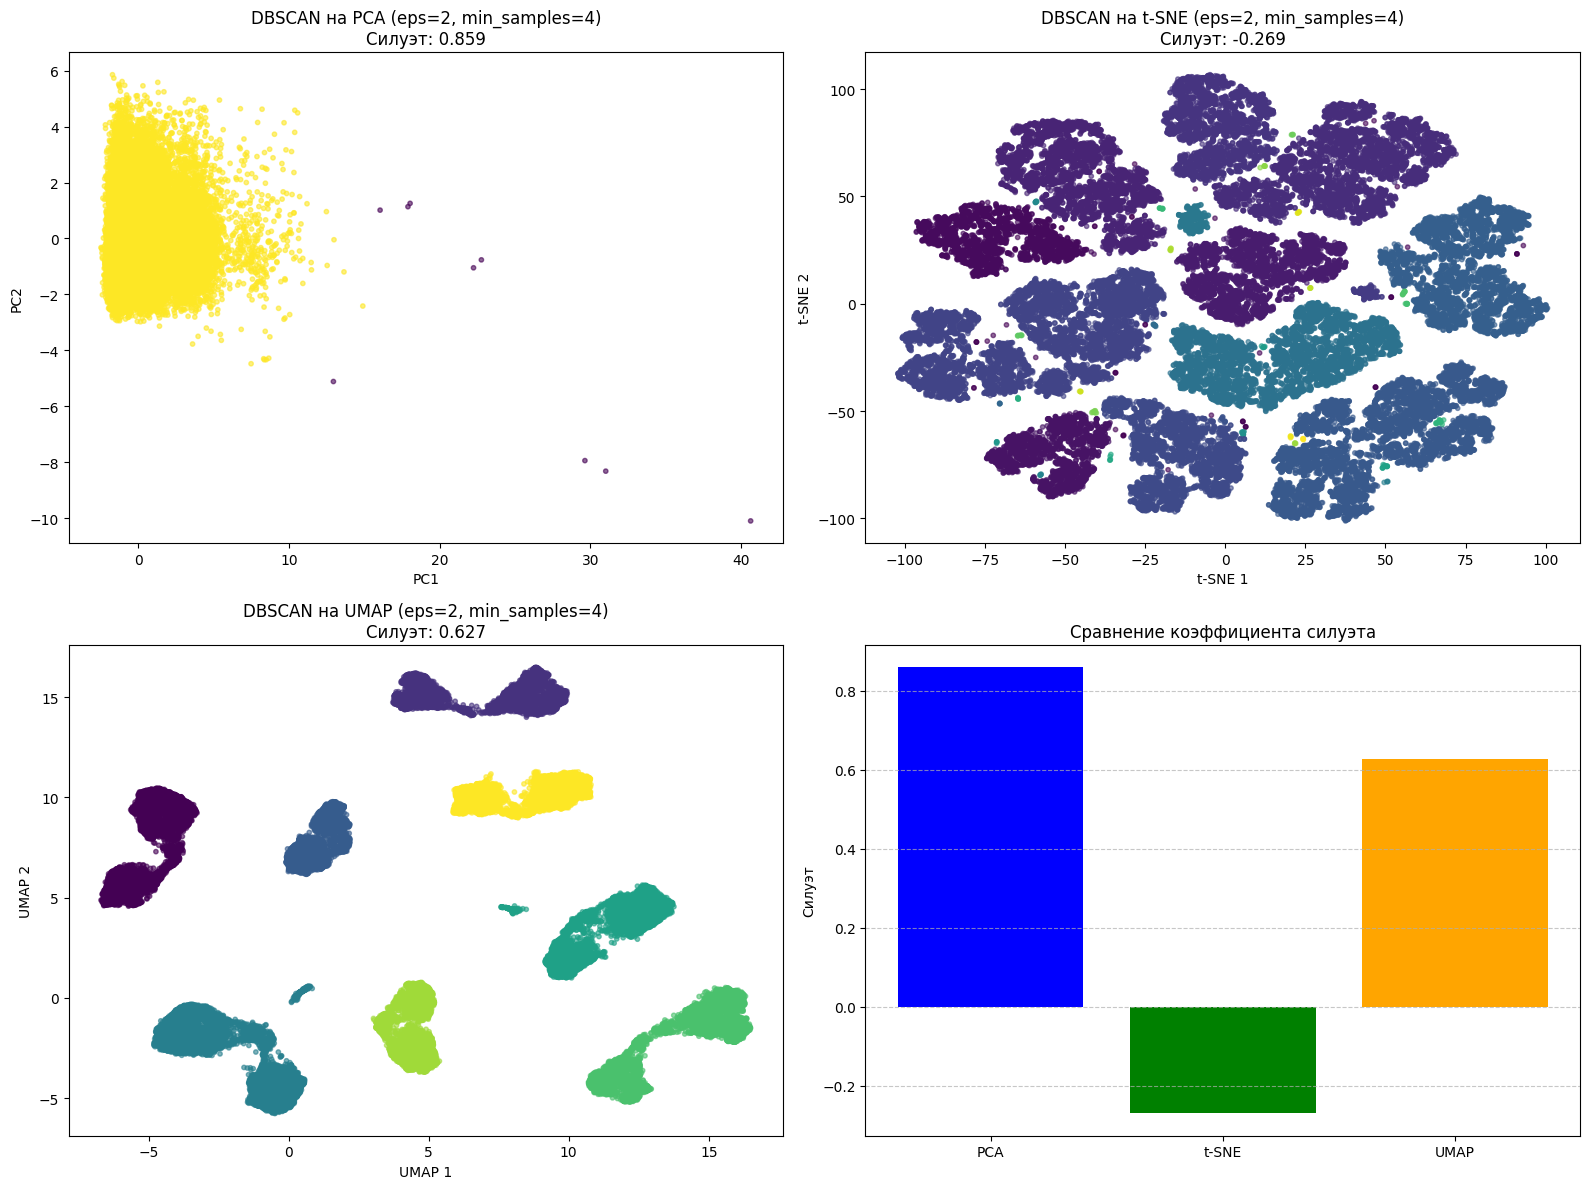

In [ ]:
# DBSCAN на t-SNE и UMAP
dbscan_tsne = DBSCAN(eps=2, min_samples=4)
cluster_labels_tsne = dbscan_tsne.fit_predict(X_tsne)

dbscan_umap = DBSCAN(eps=2, min_samples=4)
cluster_labels_umap = dbscan_umap.fit_predict(X_umap)

# Метрики
silhouette_tsne = silhouette_score(X_tsne, cluster_labels_tsne)
db_tsne = davies_bouldin_score(X_tsne, cluster_labels_tsne)
ch_tsne = calinski_harabasz_score(X_tsne, cluster_labels_tsne)

silhouette_umap = silhouette_score(X_umap, cluster_labels_umap)
db_umap = davies_bouldin_score(X_umap, cluster_labels_umap)
ch_umap = calinski_harabasz_score(X_umap, cluster_labels_umap)

print(f'''\n=== Метрики DBSCAN на t-SNE ===
  Силуэт: {silhouette_tsne:.3f}
  DB Index: {db_tsne:.3f}
  CH Index: {ch_tsne}''')

print(f'''\n=== Метрики DBSCAN на UMAP ===
  Силуэт: {silhouette_umap:.3f}
  DB Index: {db_umap:.3f}
  CH Index: {ch_umap}''')

# Визуализация
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# PCA
axes[0,0].scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels_dbscan_pca, cmap='viridis', s=10, alpha=0.6)
axes[0,0].set_title('DBSCAN на PCA (eps=2, min_samples=4)\nСилуэт: 0.859')
axes[0,0].set_xlabel('PC1')
axes[0,0].set_ylabel('PC2')
# t-SNE
axes[0,1].scatter(X_tsne[:,0], X_tsne[:,1], c=cluster_labels_tsne, cmap='viridis', s=10, alpha=0.6)
axes[0,1].set_title('DBSCAN на t-SNE (eps=2, min_samples=4)\nСилуэт: {:.3f}'.format(silhouette_tsne))
axes[0,1].set_xlabel('t-SNE 1')
axes[0,1].set_ylabel('t-SNE 2')

# UMAP
axes[1,0].scatter(X_umap[:,0], X_umap[:,1], c=cluster_labels_umap, cmap='viridis', s=10, alpha=0.6)
axes[1,0].set_title('DBSCAN на UMAP (eps=2, min_samples=4)\nСилуэт: {:.3f}'.format(silhouette_umap))
axes[1,0].set_xlabel('UMAP 1')
axes[1,0].set_ylabel('UMAP 2')

# Сравнение метрик
axes[1,1].bar(['PCA', 't-SNE', 'UMAP'], [0.859, silhouette_tsne, silhouette_umap], color=['blue', 'green', 'orange'])
axes[1,1].set_title('Сравнение коэффициента силуэта')
axes[1,1].set_ylabel('Силуэт')
axes[1,1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
# K-means
kmeans_pca = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels_kmeans_pca = kmeans_pca.fit_predict(X_pca)

kmeans_tsne = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels_kmeans_tsne = kmeans_tsne.fit_predict(X_tsne)

kmeans_umap = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels_kmeans_umap = kmeans_umap.fit_predict(X_umap)

# Вычисляем метрики
silhouette_kmeans_pca = silhouette_score(X_pca, cluster_labels_kmeans_pca)
db_kmeans_pca = davies_bouldin_score(X_pca, cluster_labels_kmeans_pca)
ch_kmeans_pca = calinski_harabasz_score(X_pca, cluster_labels_kmeans_pca)

silhouette_kmeans_tsne = silhouette_score(X_tsne, cluster_labels_kmeans_tsne)
db_kmeans_tsne = davies_bouldin_score(X_tsne, cluster_labels_kmeans_tsne)
ch_kmeans_tsne = calinski_harabasz_score(X_tsne, cluster_labels_kmeans_tsne)

silhouette_kmeans_umap = silhouette_score(X_umap, cluster_labels_kmeans_umap)
db_kmeans_umap = davies_bouldin_score(X_umap, cluster_labels_kmeans_umap)
ch_kmeans_umap = calinski_harabasz_score(X_umap, cluster_labels_kmeans_umap)

print("\n=== Метрики K-means на PCA ===")
print(f"  Силуэт: {silhouette_kmeans_pca:.3f}")
print(f"  DB Index: {db_kmeans_pca:.3f}")
print(f"  CH Index: {ch_kmeans_pca:.3f}")

print("\n=== Метрики K-means на t-SNE ===")
print(f"  Силуэт: {silhouette_kmeans_tsne:.3f}")
print(f"  DB Index: {db_kmeans_tsne:.3f}")
print(f"  CH Index: {ch_kmeans_tsne:.3f}")

print("\n=== Метрики K-means на UMAP ===")
print(f"  Силуэт: {silhouette_kmeans_umap:.3f}")
print(f"  DB Index: {db_kmeans_umap:.3f}")
print(f"  CH Index: {ch_kmeans_umap:.3f}")


=== Метрики K-means на PCA ===
  Силуэт: 0.433
  DB Index: 0.995
  CH Index: 26578.545

=== Метрики K-means на t-SNE ===
  Силуэт: 0.355
  DB Index: 1.173
  CH Index: 26967.391

=== Метрики K-means на UMAP ===
  Силуэт: 0.432
  DB Index: 1.069
  CH Index: 33744.855


In [ ]:
# Иерархическая кластеризация
linkage_pca = linkage(X_pca, method='ward')
cluster_labels_hier_pca = fcluster(linkage_pca, 2, criterion='maxclust')

linkage_tsne = linkage(X_tsne, method='ward')
cluster_labels_hier_tsne = fcluster(linkage_tsne, 2, criterion='maxclust')

linkage_umap = linkage(X_umap, method='ward')
cluster_labels_hier_umap = fcluster(linkage_umap, 2, criterion='maxclust')

# Вычисляем метрики
silhouette_hier_pca = silhouette_score(X_pca, cluster_labels_hier_pca)
db_hier_pca = davies_bouldin_score(X_pca, cluster_labels_hier_pca)
ch_hier_pca = calinski_harabasz_score(X_pca, cluster_labels_hier_pca)

silhouette_hier_tsne = silhouette_score(X_tsne, cluster_labels_hier_tsne)
db_hier_tsne = davies_bouldin_score(X_tsne, cluster_labels_hier_tsne)
ch_hier_tsne = calinski_harabasz_score(X_tsne, cluster_labels_hier_tsne)

silhouette_hier_umap = silhouette_score(X_umap, cluster_labels_hier_umap)
db_hier_umap = davies_bouldin_score(X_umap, cluster_labels_hier_umap)
ch_hier_umap = calinski_harabasz_score(X_umap, cluster_labels_hier_umap)

print("\n=== Метрики Иерархической кластеризации на PCA ===")
print(f"  Силуэт: {silhouette_hier_pca:.3f}")
print(f"  DB Index: {db_hier_pca:.3f}")
print(f"  CH Index: {ch_hier_pca:.3f}")

print("\n=== Метрики Иерархической кластеризации на t-SNE ===")
print(f"  Силуэт: {silhouette_hier_tsne:.3f}")
print(f"  DB Index: {db_hier_tsne:.3f}")
print(f"  CH Index: {ch_hier_tsne:.3f}")

print("\n=== Метрики Иерархической кластеризации на UMAP ===")
print(f"  Силуэт: {silhouette_hier_umap:.3f}")
print(f"  DB Index: {db_hier_umap:.3f}")
print(f"  CH Index: {ch_hier_umap:.3f}")

In [ ]:
# Визуализация всех результатов
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# K-means
axes[0,0].scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels_kmeans_pca, cmap='viridis', s=10, alpha=0.6)
axes[0,0].set_title('K-means на PCA\nСилуэт: {:.3f}'.format(silhouette_kmeans_pca))
axes[0,0].set_xlabel('PC1')
axes[0,0].set_ylabel('PC2')

axes[0,1].scatter(X_tsne[:,0], X_tsne[:,1], c=cluster_labels_kmeans_tsne, cmap='viridis', s=10, alpha=0.6)
axes[0,1].set_title('K-means на t-SNE\nСилуэт: {:.3f}'.format(silhouette_kmeans_tsne))
axes[0,1].set_xlabel('t-SNE 1')
axes[0,1].set_ylabel('t-SNE 2')

axes[0,2].scatter(X_umap[:,0], X_umap[:,1], c=cluster_labels_kmeans_umap, cmap='viridis', s=10, alpha=0.6)
axes[0,2].set_title('K-means на UMAP\nСилуэт: {:.3f}'.format(silhouette_kmeans_umap))
axes[0,2].set_xlabel('UMAP 1')
axes[0,2].set_ylabel('UMAP 2')

# Иерархическая кластеризация
axes[1,0].scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels_hier_pca, cmap='viridis', s=10, alpha=0.6)
axes[1,0].set_title('Иерархическая на PCA\nСилуэт: {:.3f}'.format(silhouette_hier_pca))
axes[1,0].set_xlabel('PC1')
axes[1,0].set_ylabel('PC2')

axes[1,1].scatter(X_tsne[:,0], X_tsne[:,1], c=cluster_labels_hier_tsne, cmap='viridis', s=10, alpha=0.6)
axes[1,1].set_title('Иерархическая на t-SNE\nСилуэт: {:.3f}'.format(silhouette_hier_tsne))
axes[1,1].set_xlabel('t-SNE 1')
axes[1,1].set_ylabel('t-SNE 2')
axes[1,2].scatter(X_umap[:,0], X_umap[:,1], c=cluster_labels_hier_umap, cmap='viridis', s=10, alpha=0.6)
axes[1,2].set_title('Иерархическая на UMAP\nСилуэт: {:.3f}'.format(silhouette_hier_umap))
axes[1,2].set_xlabel('UMAP 1')
axes[1,2].set_ylabel('UMAP 2')

plt.tight_layout()
plt.show()